In [ ]:
lr =  0.1
batch_local = 10   # Size of local minibatch
E = 3 #3  # Local training epoch
epoch_max = 300
D = sum( p.numel() for p in net.parameters() if p.requires_grad)   # Number of parameters in model, 582,026 

noise_pow_dBm = -80 #-50
P_dBm = 20

B = 1024    # Number of subcarrier

cell_radius = 400   # Distance to the farthest devices
density = 250/(np.pi*500**2)   # 200 devices within 500m in average
pathloss_exponent = 4

num_classes = 3   # Number of classes in local dataset
samples_avg_local = 200   # Average number of local samples
samples_CU = samples_avg_local   # Average number of samples at CU

regul_coeff = 10e-5   # L2 regularization parameter for avoiding overfitting

gamma = 100
g_th = 0.5 * cell_radius ** -pathloss_exponent

In [6]:
import copy
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import math

In [7]:
acc_list = ['../shared/results/Accuracy/[2021-09-11]Acc_Orth_Acc0.9859Dmax400Dens0.0003CU200.npy']
env_list = ['../shared/results/Simulation_Env/[2021-09-11]SimEnv_Orth_Acc0.9859Dmax400Dens0.0003CU200.npz']
rho_list = ['../shared/results/RHO/[2021-09-11]RHO_Orth_Acc0.9859Dmax400Dens0.0003CU200.npy']
legend_list = ['Alg.3, $|\mathcal{M}_0|=10$','Alg.3, $|\mathcal{M}_0|=50$', 'Alg.3, $|\mathcal{M}_0|=200$', 'Alg.3, $|\mathcal{M}_0|=400$', 'TCI, $|\mathcal{M}_0|=400$']
linestyle = ['-b', '-r', '-g', '-m', '--m']

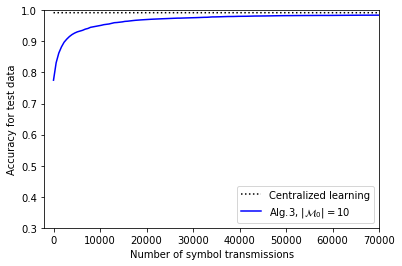

In [8]:
plt.plot(np.arange(70001), 0.9925*np.ones(70001), ':k', label='Centralized learning' )

for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], linestyle[i],label=legend_list[i])    



plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.axis([-2000, 70000, 0.3, 1])
#plt.title('Orthogonal Report for Various BS Dataset Size $|\mathcal{M}_0|$')
plt.show()

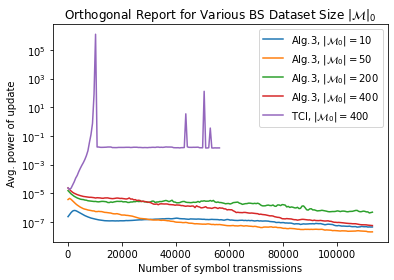

In [95]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history, label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Orthogonal Report for Various BS Dataset Size $|\mathcal{M}|_0$')
plt.show()

In [124]:
acc_list = []
env_list = []
rho_list = []

legend_list = ['No federation, Coverage: 0m', 'Alg.3, Coverage: 150m', 'Alg.3, Coverage: 300m', 'Alg.3, Coverage: 550m', 'TCI, Coverage: 550m']
linestyle = [':k', '-g', '-r', '-b', '--b']

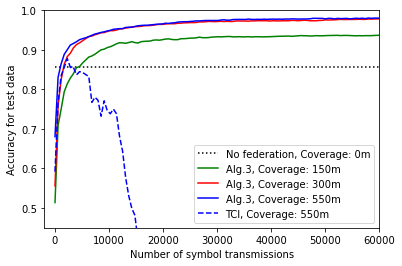

In [125]:
env = np.load(env_list[0])
epoch_max = env['epoch_max']
N = env['N']    
acc_history = np.load(acc_list[0])
plt.plot(np.arange(0,N*epoch_max, N ), np.ones(epoch_max)*acc_history[epoch_max-1], linestyle[0], label=legend_list[0])  

for i in range(1,len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history, linestyle[i],label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
#plt.title('Orthogonal Report with Various Coverages')
plt.axis([-2000, 60000, 0.45, 1])
plt.show()

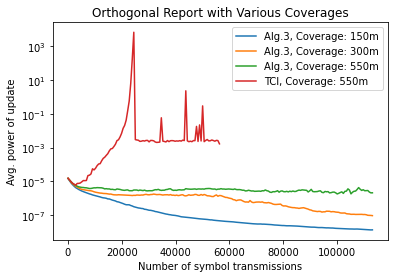

In [98]:
for i in range(1,len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history, label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Orthogonal Report with Various Coverages')
plt.show()

In [152]:
acc_list = []
env_list = []
rho_list = []

legend_list = ['Ideal channel', 'Alg.3, $P=10$dBm', 'Alg.3, $P=20$dBm', 'Alg.3, $P=30$dBm', 'TCI, $P=20$dBm', 'TCI, $P=30$dBm']
linestyle = [':k', '-g', '-r', '-b', '--r', '--b']

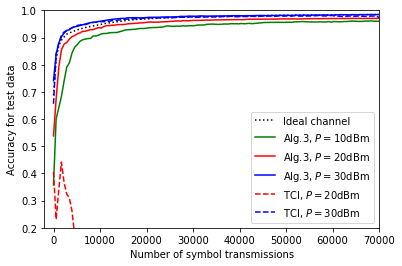

In [155]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history, linestyle[i],label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.axis([-2000, 70000, 0.2, 1])
#plt.title('Orthogonal Report with Various Power Budget')
plt.show()

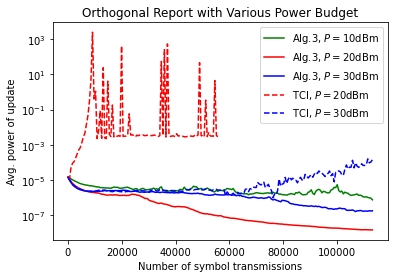

In [101]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history, linestyle[i],label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Orthogonal Report with Various Power Budget')
plt.show()

## Compressed Report

In [4]:
acc_list = ['../shared/results/Accuracy/[2021-09-11]Acc_CS_Acc0.8678CmpRate0.4Dmax400CU200P100.0.npy',
            '../shared/results/Accuracy/[2021-09-11]Acc_CS_Acc0.876CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-09-11]Acc_CS_TCI_Acc0.8742CmpRate0.1Dmax400CU200P100.0.npy']            
env_list = ['../shared/results/Simulation_Env/[2021-09-11]Sim_CS_Acc0.8678CmpRate0.4Dmax400CU200P100.0.npz',
            '../shared/results/Simulation_Env/[2021-09-11]Sim_CS_Acc0.876CmpRate0.1Dmax400CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-09-11]Sim_CS_TCI_Acc0.8742CmpRate0.1Dmax400CU200P100.0.npz']
rho_list = ['../shared/results/RHO/[2021-09-11]RHO_CS_Acc0.8678CmpRate0.4Dmax400CU200P100.0.npy',
            '../shared/results/RHO/[2021-09-11]RHO_CS_Acc0.876CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/RHO/[2021-09-11]RHO_CS_TCI_Acc0.8742CmpRate0.1Dmax400CU200P100.0.npy']
legend_list = ['Alg.3, $F/F_{org}=1$ ', 'Alg.4, $F/F_{org}=0.8$ ', 'Alg.4, $F/F_{org}=0.4$', 'Alg.4, $F/F_{org}=0.1$', 'TCI, $F/F_{org}=0.1$']
linestyle = [':k', '-g', '-r', '-b', '--b']

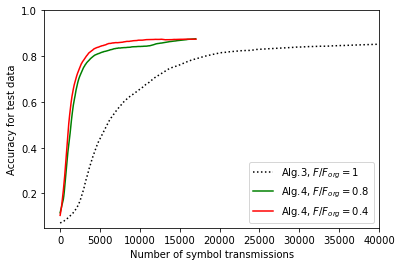

In [5]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N'] 
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], linestyle[i],label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.axis([-2000, 40000, 0.05, 1])
#plt.title('Compressed Report with Compression Rate')
plt.show()

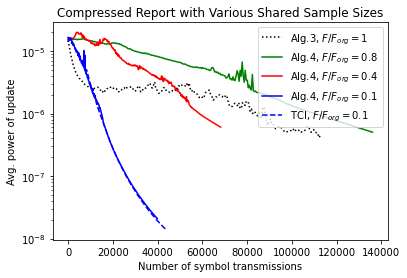

In [104]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history[:epoch_max], linestyle[i], label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Compressed Report with Various Shared Sample Sizes')
plt.show()

In [108]:
acc_list = []
env_list = []
rho_list = []
legend_list = ['No federation, Coverage: 0m', 'Alg.4, Coverage: 150m', 'Alg.4, Coverage: 300m', 'Alg.4, Coverage: 550m', 'TCI, Coverage: 150m', 'TCI, Coverage: 300m', 'TCI, Coverage: 550m']
linestyle = [':k', '-b', '-r', '-g', '--b', '--r','--g']

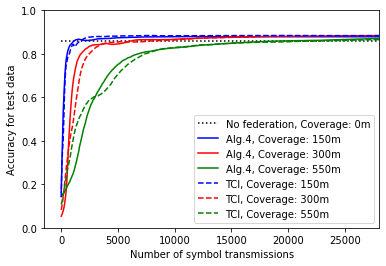

In [109]:
env = np.load(env_list[0])
epoch_max = env['epoch_max']
N = env['N']    
acc_history = np.load(acc_list[0])
plt.plot(np.arange(0,N*epoch_max, N ), np.ones(epoch_max)*acc_history[epoch_max-1], linestyle[0], label=legend_list[0])  

for i in range(1, len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], linestyle[i], label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
#plt.title('Compressed Report with Various Coverage')
plt.axis([-1500, 28000, 0, 1])
plt.show()

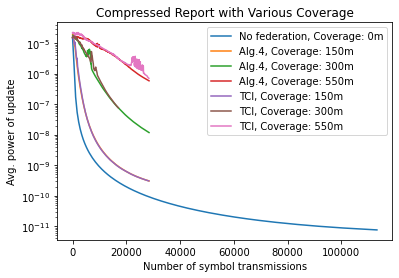

In [110]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history[:epoch_max], label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Compressed Report with Various Coverage')
plt.show()

In [121]:
acc_list = []
env_list = []
rho_list = []
legend_list = ['Alg.4, $P=10$dBm', 'Alg.4, $P=20$dBm', 'Alg.4, $P=30$dBm', 'TCI, $P=10$dBm', 'TCI, $P=20$dBm', 'TCI, $P=30$dBm']
linestyle = ['-b', '-r', '-g', '--b', '--r','--g']

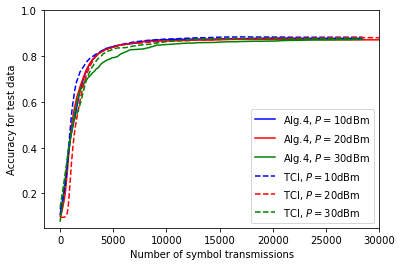

In [122]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], linestyle[i], label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
#plt.title('Compressed Report with Various Power Budget')
plt.axis([-1500, 30000, 0.05, 1])
plt.show()

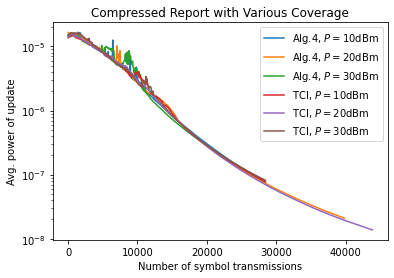

In [123]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history[:epoch_max], label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Compressed Report with Various Coverage')
plt.show()

In [167]:
acc_list = []
env_list = []
rho_list = []
legend_list = ['Proposed, $|\mathcal{M}_0|=10$', 'Proposed, $|\mathcal{M}_0|=50$','Proposed, $|\mathcal{M}_0|=200$', 'Proposed, $|\mathcal{M}_0|=400$', 'TCI, $|\mathcal{M}_0|=400$']

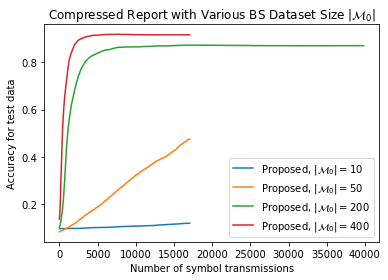

In [168]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history, label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.title('Compressed Report with Various BS Dataset Size $|\mathcal{M}_0|$')
plt.show()

In [ ]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history, label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Compressed Report with Various BS Dataset Size $|\mathcal{M}_0|$')
plt.show()